### Name, info, blablabla

# I - The Prior

#### Question 1
-Why a Gaussian likelihood is a sensible choice:
        
Mainly because of analyctical tractability... And you could argue, by the CLT, if you have no idea what the error distribution should look like, let it be normal: if we specified our model on say N  different (and independent) populations with an unknown (but i.i.d.) error term, the average of these error terms will in the limit ($N \to \infty$) be a Gaussian.

-A spherical covariance matrix:

Just means that we have refrained from specifying the full covariance matrix. It is a special case of a diagonal covariance matrix, where all the elements are the same. It is a modeling simplification that means that instead of having to estimate the D/(D+1)/2 entries of a full diagonal matrix we only have to estimate 1 parameter ($\sigma^2$). The structure this imposes is: given our observation ($\mathbf x$), the conditional distribution of the target ($\mathbf y$) does not depend on the correlation between the target values. In the Gaussian case this is assuming conditional independence.


#### Question 2

We can still factor it into a product of only conditional probabilities by successively applying the chain rule:

\begin{align*}
p(\mathbf Y | f, \mathbf X) & = p(\mathbf y_1 | f, \mathbf X) p(\mathbf y_2 | \mathbf y_1 ,f, \mathbf X) p(\mathbf y_3 | \mathbf{y}_2,\mathbf{y}_1 ,f, \mathbf X)...p(\mathbf y_N | \mathbf{y}_1,\mathbf y_2,...,\mathbf y_{N-1} ,f, \mathbf X) 
\end{align*}

Where the order of the $\mathbf y_i$'s is arbitrary. In the general case, since $\mathbf y_i$ may depend on any $\mathbf x_j$ we can not factor out the individual $\mathbf x_j$'s 

#### Question 3

If we reinvoke the independency assumption the likelihood is given by eqn. (3) in the text, where $p(\cdot)$ is the multivariate normal pdf with mean and variance according to eqn. (2)

\begin{align*}
p(\mathbf Y | \mathbf X, \mathbf W) & = \prod_{i=1}^{N} \mathcal N(\mathbf y_i |\mathbf {Wx}_i, \sigma^2 \mathbf I )  \\
    & = \prod_{i=1}^{N} \frac{1}{(2\pi)^{D/2}\sigma} \exp \left( -\frac{1}{2\sigma^2} (\mathbf y_i - \mathbf{Wx}_i)' (\mathbf y_i - \mathbf{Wx}_i ) \right)
\end{align*}

where $\mathbf W$ is $q \times D$, $\mathbf y_j$ is $D \times 1$ and $\mathbf x_j$ is $q \times 1$, which means that the joint likelihood is a matrix multivariate normal.

#### Question 4
A prior is conjugate if the resulting posterior distribution is in the same family. This is extremely convenient as it simplifies our algebraic work (the resulting posterior may be incredible nasty depending on the chosen likelihood and prior). In general Gaussians are a family of conjugate distributions. If the likelihood and prior is Gaussian, the resulting posterior will be Gaussian. (This is by the way the reason the Kalman filter has a nice closed formed solution: for every observation we get in, the resulting posterior predictive distribution will be Gaussian...)


#### Question 5

Think about what this says about our belief about coefficients that "departs" from our mean ($\mathbf W_0$): as we move further away (from this mean) the L2 norm progressively reduces the 'probability' of these (because is *squares* the distance), while the L1 norm (absolute difference) would "tolerate" these larger deviations more.

Let's make an analogy for these beliefs: if my prior is a rubberband, centered at my mean, the norm determines how stretchable this rubberband is. A very flexible band can be stretched quite far from my mean without breaking, this would be the L1 norm. My L2 rubberband would not be able to strech this far, and it would get more difficult to stretch (compared to the L1 rubber) the further I extend it beyond my mean. 

#### Question 6

First of all, for simplicity let us consider the case where $\mathbf y$ is one dimensional, then eqn. (5) is a scalar valued function, and $\mathbf W := \mathbf w$ will be a $q \times 1$ vector and $\epsilon_i \sim \mathcal N(0, \sigma^2)$:

\begin{align*}
y_i = \mathbf w' \mathbf x_i + \epsilon_i
\end{align*}

The likelihood is then

\begin{align*}
    p(\mathbf Y | \mathbf X, \mathbf W) & = \prod_{i=1}^{N} \mathcal N(y_i |\mathbf {w'x}_i, \sigma^2)  \\
    & = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{1}{2\sigma^2} (y_i - \mathbf w' \mathbf x_i)^2 \right) \\
    & = \frac{1}{(2\pi\sigma^2)^{N/2}} \exp \left( -\frac{1}{2\sigma^2} (\mathbf y - \mathbf{X'w})' (\mathbf y - \mathbf{X'w} ) \right)
\end{align*}

$\mathbf X$ is the $q\times N$ observation matrix (i.e. the transpose of the design matrix) and $\mathbf y$ is $N \times 1$, the prior pdf is ($\mathbf I$: $q \times q$)

\begin{align*}
P(\mathbf w) & = \mathcal N(\mathbf w | \mathbf w_0, \tau^2 \mathbf I) \\
        & = \frac{1}{(2\pi)^{q/2}\tau} \exp \left( -\frac{1}{2\tau^2} (\mathbf w - \mathbf w_0)' (\mathbf w - \mathbf w_0 ) \right)
\end{align*}


So the posterior (eqn. (7)) is a product of two Gaussians. From the conjugancy property we know that this distribution will also be Gaussian (and we know how the expanded quadratic form should like like), we only have to figure out the terms corresponding to the mean and covariance matrix which characterizes this distribution:

\begin{align*}
p(\mathbf w | \mathbf X, \mathbf Y) &= \mathcal N(\mathbf w | \mathbf \mu_p, \mathbf \Sigma_p) \\
    & \propto  \exp \left( -\frac{1}{2\sigma^2} (\mathbf y - \mathbf{X'w})' (\mathbf y - \mathbf{X'w} ) -\frac{1}{2\tau^2} (\mathbf w - \mathbf w_0)' (\mathbf w - \mathbf w_0 ) \right) \\
    & =  \exp \left( -\frac{1}{2\sigma^2}\mathbf{y'y} + \frac{1}{\sigma^2}\mathbf{w'Xy} - \frac{1}{2\sigma^2}\mathbf{(X'w)'(X'w)}  
     -\frac{1}{2\tau^2}\mathbf{w'w} + \frac{1}{\tau^2}\mathbf{w'w_0} - \frac{1}{2\tau^2}\mathbf{w'_0w_0} \right) \\
 & =  \exp \left( \frac{1}{\sigma^2}\mathbf{w'Xy} + \frac{1}{\tau^2}\mathbf{w'w_0} - \frac{1}{2}\mathbf w'(\frac{1}{\sigma^2}\mathbf{XX'} + \frac{1}{\tau^2}\mathbf I)\mathbf w  
      - \frac{1}{2\tau^2}\mathbf{w'_0w_0} -\frac{1}{2\sigma^2}\mathbf{y'y} \right) 
\end{align*}

We know how the final Gaussian should look like ($\propto (\mathbf w - \mathbf \mu_p)'\mathbf \Sigma_p^{-1}(\mathbf w - \mathbf \mu_p)=...$), we just have to complete the square and match the terms. We can identify the inverse covariance matrix from the final expression:

\begin{align*}
\mathbf \Sigma_p^{-1} = \frac{1}{\sigma^2}\mathbf{XX'} + \frac{1}{\tau^2}\mathbf I
\end{align*}

$\mu_p$ can be identified by the mixed term $\mathbf w' \mathbf \Sigma_p^{-1} \mu_p$:

\begin{align*}
\mathbf w' (\frac{1}{\sigma^2}\mathbf{XX'} + \frac{1}{\tau^2}\mathbf I) \mathbf \mu_p &=  \frac{1}{\sigma^2}\mathbf{w'Xy} + \frac{1}{\tau^2}\mathbf{w'w_0} \\
  &\implies \mathbf \mu_p = (\frac{1}{\sigma^2}\mathbf{XX'} + \frac{1}{\tau^2}\mathbf I)^{-1}  (\frac{1}{\sigma^2}\mathbf{Xy} + \frac{1}{\tau^2}\mathbf{w_0}) 
\end{align*}

So we have
\begin{align*}
\mathbf \Sigma_p & = (\frac{1}{\sigma^2}\mathbf{XX'} + \frac{1}{\tau^2}\mathbf I)^{-1} \\
\mathbf \mu_p & = \mathbf \Sigma_p (\frac{1}{\sigma^2}\mathbf{Xy} + \frac{1}{\tau^2}\mathbf{w_0})
\end{align*}

$Z$ is just a normalization constant.

#### Question 7

Parametric vs non-parametric: the essential difference is that in a parametric model you impose structure trough your parametrization of the model and the underlying distribution. This has benefits as it aids interpretation, you can look at an estimated coefficient and say something meaningful. A non-parametric model is the opposite, here we construct our model by letting the data "decide" (trough an appropriate method) which model we end up with. Here we gain flexibility in representability as our model and (the number of) parameters are flexible. This has a disadvantage in terms of interpretability: we cannot necessarily look at the final model, pick out a coefficient, and say something meaningful (f.ex: since $\theta_1$ is bigger than 4.5 we know that (...) )  


#### Question 8

What this prior does:

So, instead of inserting practically the exact same figures, I'll refer to those from the lecture slides (Gaussian processes) pages 27-39. This prior is a distribution of N function values, where N is the number of observations. Let's say we have N=2 observations, (= 1 and 2), and we believe the output of our function to be highly correlated for these two observations. This could correspond to a prior VCM like slides: (31), where the figure shows the contour of the joint distribution. For an observation at x=1, our corresponding function value should be very similar, so the conditional distribution, has its mass centered (slides: (32)) close to this, and likewise for x=2.

**Clarify this ...**

#### Question 9

Applying the chain rule gives

\begin{align*}
p(\mathbf{Y, X}, f, \boldsymbol{\theta}) &= P(\mathbf Y | \mathbf X, f, \boldsymbol \theta) P(f | \mathbf X, \boldsymbol \theta) P(\mathbf X, \boldsymbol \theta)
\end{align*}

if we assume $\mathbf X$ and $\boldsymbol \theta$ are independent and that $\mathbf Y$ is conditionally independent of $\mathbf X, \boldsymbol \theta$ we end up with

\begin{align*}
p(\mathbf{Y, X}, f, \boldsymbol{\theta}) &= P(\mathbf Y |f) P(f | \mathbf X, \boldsymbol \theta) P(\mathbf X) P(\boldsymbol \theta)
\end{align*}

The graphical representation is:

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


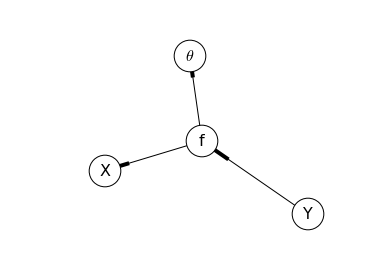

In [15]:
%load_ext autoreload
%matplotlib inline
%autoreload 2
from code import Q9
Q9.run()

#### Question 10

If you look at this as a summation we are weighting our data by our prior, for all possible latent Gaussian vectors f. Uncertainty 'filters out' as we are condensing everything down to an average. This likelihood is still conditional on $\boldsymbol \theta$ (how we parameterize the kernel), which is why this is still left on the left-hand side...

## Practical

####  Question 11

See the figure below. Here we just use what we derived in Question 6. $\mathbf X$ is now a $2\times N$ matrix where the last row is just a sequence of 1's.

When the number of observations is equal to zero the posterior is the same as the prior (just look at the final equations for the mean and covariance matrix in Question 6). I chose a zero mean prior with a unit diagonal VCM, this is the first row in the plot. The first column displays the contour lines of the posterior (prior when observations=0) and the right column shows 4 sampled lines from this distribution. Each row then shows the effect of doing the estimation with more data (b/c of independence and the conjugancy property this would be exactly the same as doing sequential estimating by adding 1 observation per step)

What we see is perfectly reasonable. As we incorporate more evidence, our revised belief changes accordingly: the posterior distribution variance decreases and the correlation between the slope and intercept changes to take account for what we have observed.

With the entire sample incorporated we are just as close to the population regression function as the classical ML estimator from orthodox statistics is (a general asymptotic property...)


Populating the interactive namespace from numpy and matplotlib


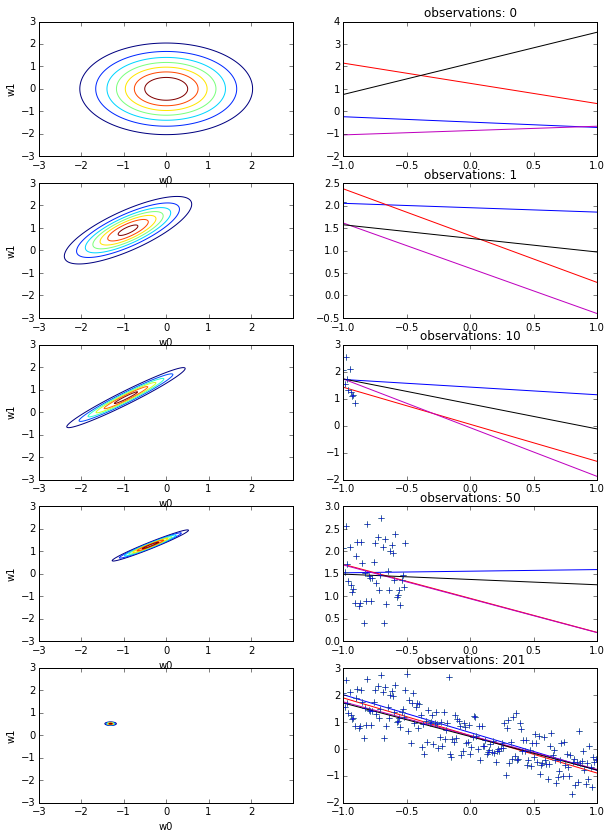

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 14)
from code import Q11
Q11.run(tau=1)

Let's see what happens if we specify a prior that does not cover the true population parameters. Here we are essentially "sure" that (w1, w2) both are extremely close to zero.


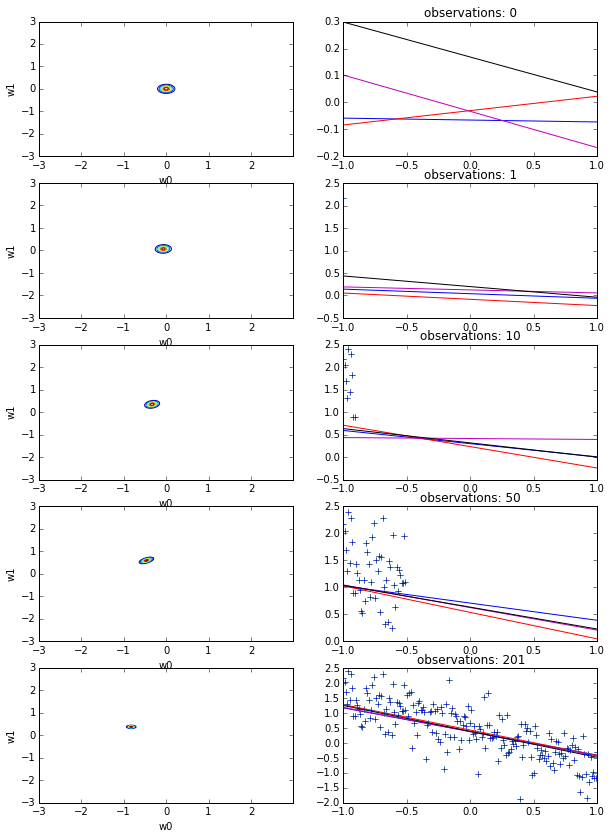

In [7]:
Q11.run(tau=.1)

Our final posterior distribution is centered at approx (-0.8, -0.5) with no probability mass at the population values (-1.3, 0.5)

If we instead specify an extremely wide prior, our posterior distribution requires more samples to converge, but does so correctly: (in the limit $\tau \rightarrow \infty$ we can see from Question 6 that the posterior mean converges to the classical ML regression estimate)

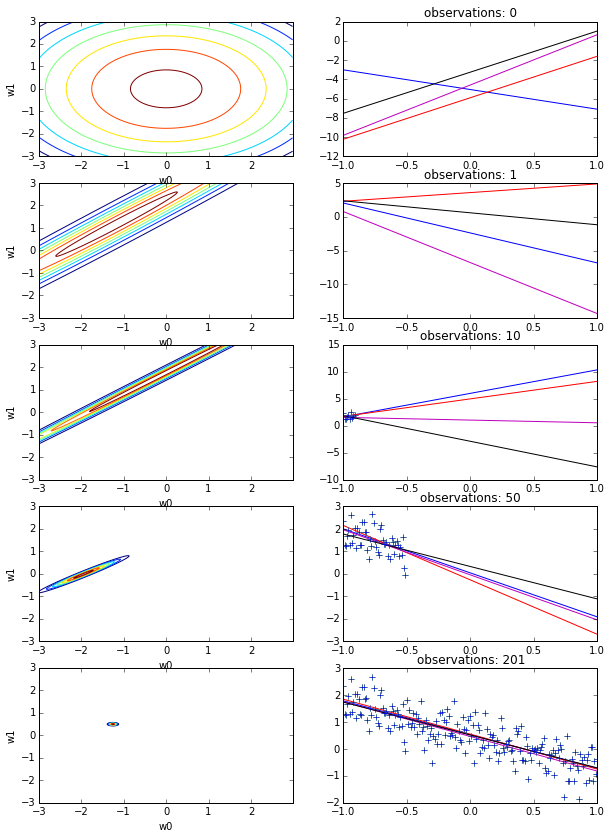

In [8]:
Q11.run(tau=5.5)

####  Question 12

Let's look at 100 function values over the interval (-1,...,1). Our GP posterior is then a multivariate normal with a 100-dimensional zero mean vector and a $100\times100$ covariance matrix where each element is given by equation (17) - which describes the covariance structure between every point in the input space of our function.

In the GP setting our function output over this domain is distributed according to the above distribution, and below I draw 4 samples from this distribution for different values of $l$ ($\sigma^2=1$ and is just scaling the output by a constant)

Just looking at equation (17) makes the role of $l$ apparent (in 1-D): the term in the exponent is the squared euclidean distance, if we fix an observation, equation (17) will look like a normal pdf with mean at this observation point, and kernel output exponentially decaying (symmetrically) as we move further away from this point. $l$ determines how quickly this decays: a very high value will give a kernel output of close to zero for observations an epsilon distance away from our fixed observation, while a large $l$ would do the opposite.

In terms of preferences this encodes our belief in the degree to which function output values that are nearby should be "similar" (i.e. close) to each other.

(One could note that by construction the diagonal of this VCM will always be 1.0)

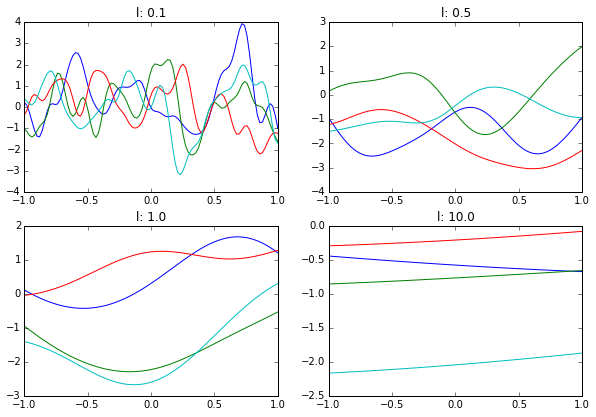

In [6]:
from code import Q12
Q12.run()

####  Question 13

If we have no data, we have no "knowledge" to incorporate in our updated belief, thus our belief stays the same, which is the prior...

####  Question 14

Below I do interpolation and prediction for 100 data points based on the 7 training observations of the noisy sine wave.

The first column shows: the true data generating process (solid black line), the 7 latent data points (solid dots), the 7 noisy observations (red dots), the mean of the posterior distribution (dashed line) and 3 samples from this posterior distribution. The second column shows the heatmap of the posterior VCM.

First of all, $f_i$ is latent (equation (10), so doing "prediction" without adding a "... diagonal co-variance matrix to the squared exponential" is the same as saying the observations of $f$ are noiseless - which is the same as doing interpolation between the observations, which is shown in the first section of the plot below.

Assuming we only observe noisy realizations of $f$, the kernel VCM of the observed realizations is just the original kernel VCM plus the observation noise ($\sigma^2_\epsilon$) times the identity matrix (since the noise is assumed to be independent). Doing prediction with these noisy observations is shown in the last rows.


As before, the $l$ parameter measures how similar distant points should be. This can be seen in the VCM heatmap: 

for $l=0.1$ the VCM is incredibly sparse, with nonzero elements only exactly on the diagonal (or very very close to it), this is because the covariance between a point and any other observation not extremely close to it, will be zero.

If we gradually increase $l$ the diagonal will get thicker because we allow points to covary with observations that are close.

At the same time the middle elements of the diagonal will shrink (symmetrically - because the middle is where the 7 training observations are and I drew equally many observations below as for above these) because we are decreasing the variance for the observations near our 7 training points (you see this from the left columns as the drawn curves get more similar in this region), while we increase the covariance (and variance) for observations further away - in effect making our fit smoother.





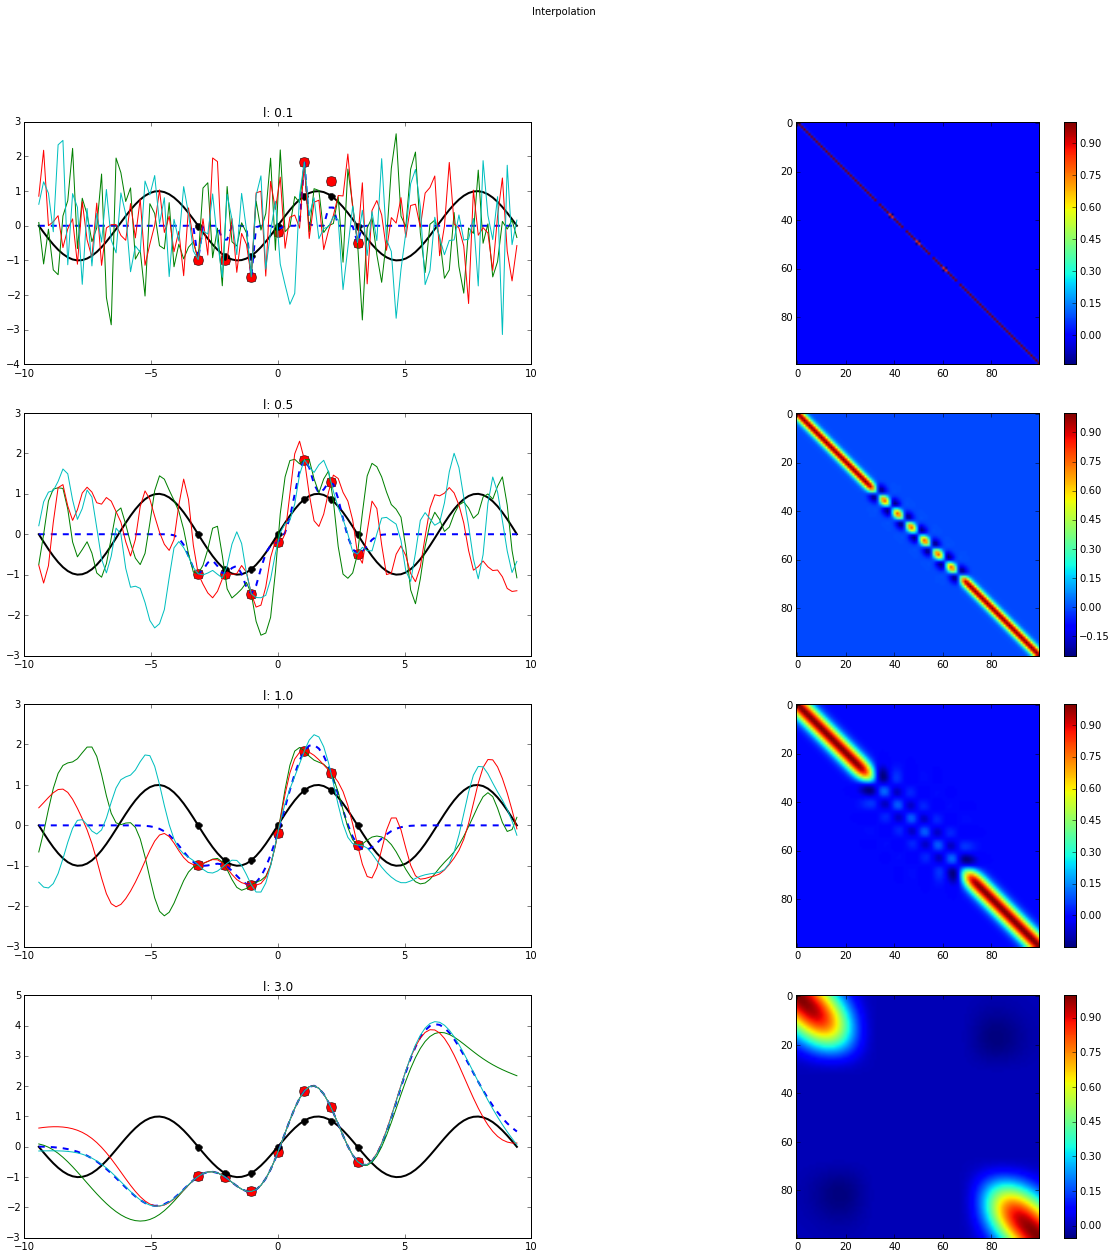

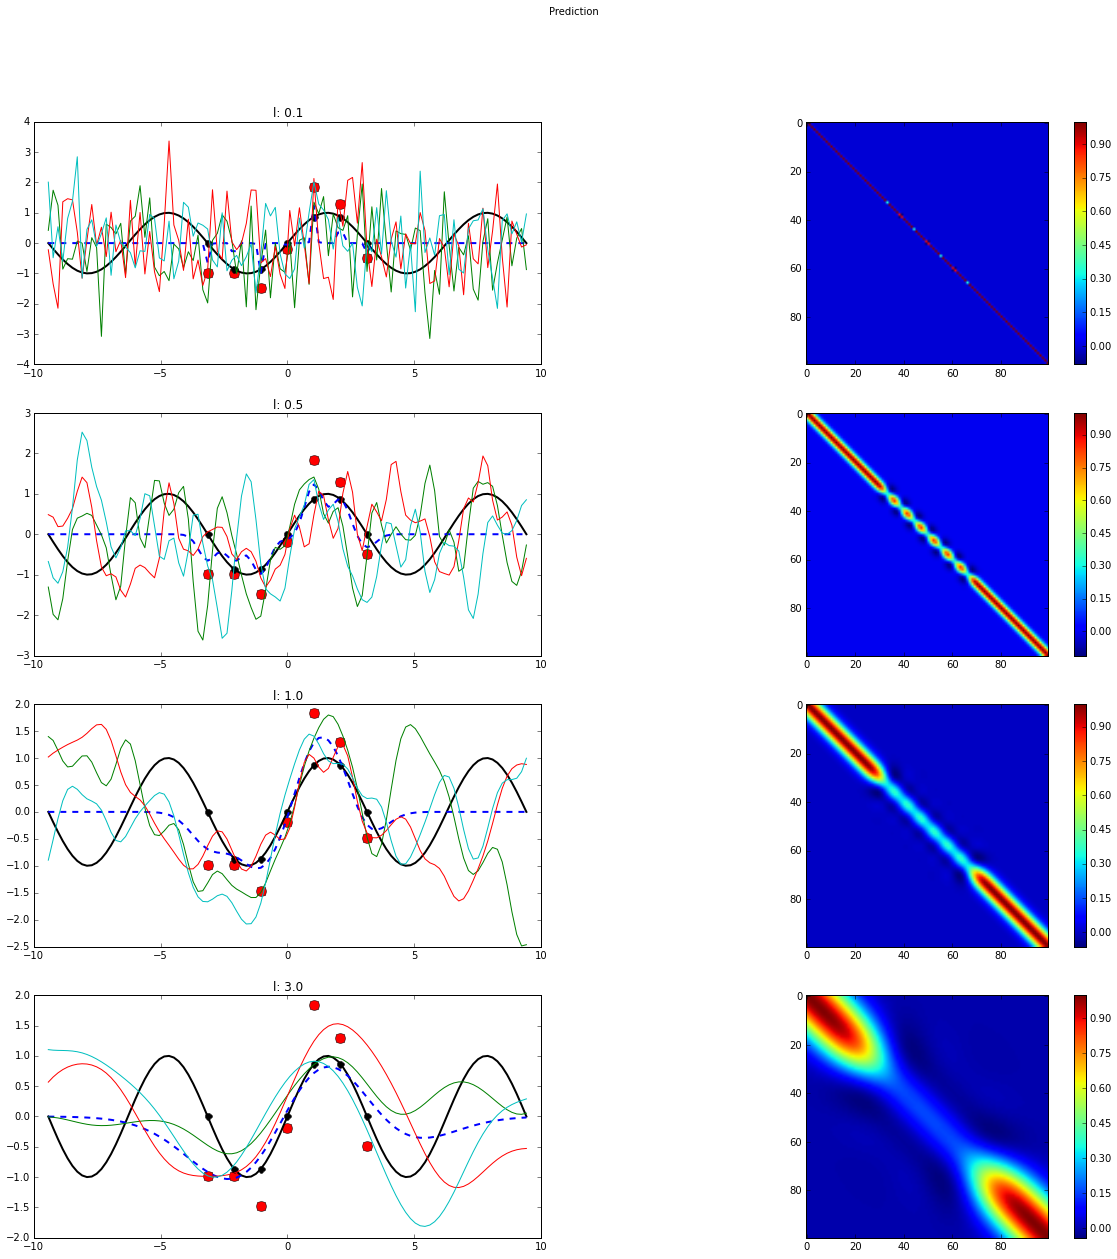

In [13]:
from code import Q14
pylab.rcParams['figure.figsize'] = (20, 20)
Q14.run()

# II - The Posterior 

#### Question 15

In this setting our prior encodes *preferences* because we are (through the dimensionality of $\mathbf x$) saying how many *factors* we prefer $\mathbf y$ to be "generated" by.  

In the preamble to this question you mention images, our prior here will encode what we prefer to be a *simpler* representation of a given image. This is one principle behind image compression (with for ex. SVD): a (suitable) lower dimensional representation of a given image will (for the layman) be visually indistinguishable from the original image.


#### Question 16

Above we saw how the prior could encode how many factors we prefer our observations to be generated by, by imposing a spherical Guassian, we are extending our preference in saying how we want these factors to *depend* on each other, in particular, we say we prefer them to be *independent*.

#### Question 17

So, in the latent linear model ($\mathbf y_i = \mathbf W \mathbf x_i + \boldsymbol \epsilon_i)$, $\boldsymbol \epsilon_i (iid) \sim \mathcal N(\mathbf 0, \sigma^2 \mathbf I)$ our likelihood is 

\begin{align*}
p(\mathbf y_i | \mathbf W, \mathbf x_i) &= \mathcal N (\mathbf y_i |  \mathbf W \mathbf x_i, \sigma^2 \mathbf I)
\end{align*}

And we just specified the prior on the latent variable to be $p(\mathbf x_i) = \mathcal N(\mathbf x_i | \mathbf{0, I})$

The marginal distribution for $\mathbf y$ is (I assume there is a typo (term missing) in eqn. (33) because that will not integrate to 1...):

\begin{align*}
p(\mathbf y_i | \mathbf W) &= \int p(\mathbf y_i | \mathbf W, \mathbf x_i) p(\mathbf x_i) d \mathbf x_i
\end{align*}

Which again will be a Gaussian, with mean and covariance

\begin{align*}
\mathop{E}(\mathbf y_i) & = \mathop{E}(\mathbf W \mathbf x_i + \boldsymbol \epsilon_i) \\
& = \mathbf 0 \\
\end{align*}

\begin{align*}
\mathop{Cov}(\mathbf y_i) &= \mathop{E}( (\mathbf W \mathbf x_i + \boldsymbol \epsilon_i)(\mathbf W \mathbf x_i + \boldsymbol \epsilon_i)') \\
&= \mathbf W \mathop{E}(\mathbf{x_i x_i'})\mathbf W' + \mathbf 0 + \mathop{E}(\boldsymbol \epsilon_i \boldsymbol \epsilon_i') \\
&= \mathbf {WW'} + \sigma^2 \mathbf I
\end{align*}

So

\begin{align*}
p(\mathbf y_i | \mathbf W) &= \mathcal N (\mathbf y_i | \mathbf 0, \mathbf {WW'} + \sigma^2 \mathbf I)
\end{align*}
